In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.learning_curve import learning_curve
from sklearn import tree, metrics
from matplotlib import pyplot as plt
from sklearn.cross_validation import train_test_split, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import  cross_val_score
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from time import time
from operator import itemgetter
from sklearn.model_selection import validation_curve
import datetime

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

import graphviz 
import os
import timeit
from IPython.display import Image

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
bank_data = pd.read_csv('bank-full.csv', delimiter = ";", header="infer")
len(bank_data)

45211

In [3]:
bank_data.shape

(45211, 17)

In [4]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Change data format

In [5]:
bank_data = pd.get_dummies(bank_data, columns=['job','marital',
                                         'education','default',
                                         'housing','loan',
                                         'contact','month',
                                         'poutcome'])

In [6]:
bank_data.y.replace(('yes','no'), (1,0), inplace = True)


In [7]:
bank_data.y.unique()

array([0, 1])

In [8]:
bank_data.shape

(45211, 52)

In [9]:
bank_data.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [10]:
y = bank_data['y']
del bank_data['y']

In [11]:
bank_data.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [12]:

# Train - Test split# Train  
X_train, X_test, y_train, y_test = train_test_split(bank_data, y, test_size  = 0.3, random_state = 1)

print("Training dataset size: ", len(X_train))
print("Testing dataset size: ", len(X_test))
print("Training label dataset size: ", len(y_train))
print("Testing label dataset size: ", len(y_test))

Training dataset size:  31647
Testing dataset size:  13564
Training label dataset size:  31647
Testing label dataset size:  13564


### Create a decision tree classifier without any pruning

In [13]:
scoring=make_scorer(accuracy_score)
clf =  tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring = scoring)
print("Accuracy of tree without pruning :" , np.mean(scores))

predictions = clf.predict(X_test)

print("Accuracy: %s%%" % (100*accuracy_score(y_test, predictions)))
print(confusion_matrix(y_test, predictions))


Accuracy of tree without pruning : 0.87417394876
Accuracy: 87.5331760543%
[[11112   901]
 [  790   761]]



train_scores = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
test_scores = [ 0.86598993  0.8698135   0.86978157  0.87107797  0.87287918  0.8727527
  0.87114132  0.87306863  0.87458526  0.87401605]
train sizes = [ 2848  5696  8544 11392 14241 17089 19937 22785 25633 28482]


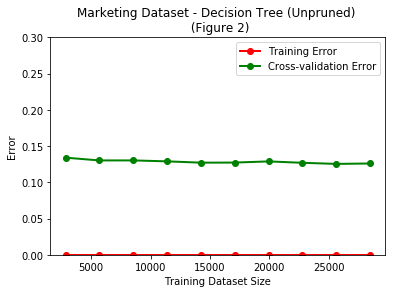

In [14]:
estimator = tree.DecisionTreeClassifier()
estimator.fit(X_train, y_train)

title = "Marketing Dataset - Decision Tree (Unpruned) \n (Figure 2)"
ylim=(0.0, 0.3)
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)
#cv = StratifiedKFold(y_train, n_folds=10)
#plot_learning_curve(estimator, title, X_train, y_train, , cv=cv, n_jobs=4)



plt.title(title)
if ylim is not None:
    plt.ylim(*ylim)
plt.xlabel("Training Dataset Size")
plt.ylabel("Error")
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X_train, y_train, cv=10, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 10))



train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
#test_scores_mean1 = np.mean(test_scores1, axis=1)

print("")
    
lw = 2
plt.plot(train_sizes, 1 - train_scores_mean, 'o-', color="r",
             label="Training Error",  lw=lw)
plt.plot(train_sizes, (1- test_scores_mean), 'o-', color="g",
             label="Cross-validation Error",  lw=lw)

plt.legend(loc="best")
print("train_scores =", train_scores_mean)
print("test_scores =", test_scores_mean)
print("train sizes =", train_sizes)
#plt.rcParams.update({'font.size': 12})
#plt.savefig("Figure-5.png")
plt.show()

### Check for hyper paramters using max_depth

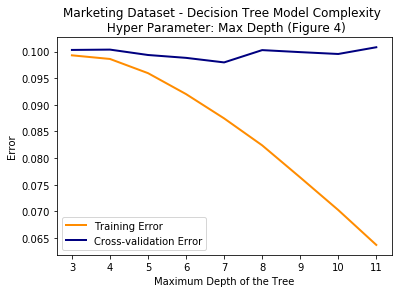

train_scores = [ 0.90071729  0.90139841  0.90405972  0.90798847  0.91254217  0.91759443
  0.92361571  0.92972828  0.9362727 ]
test_scores = [ 0.89970615  0.89964309  0.90065417  0.90119136  0.90204437  0.89973784
  0.90011705  0.90046465  0.89920077]
Optimal max depth =  7  Minimum Error =   0.0979556263621


In [15]:

np.random.seed(1)
estimator = tree.DecisionTreeClassifier()


param_range = np.arange(3,12)
train_scores, test_scores = validation_curve( estimator, X_train, y_train, param_name="max_depth", param_range=param_range,
    cv=10, scoring=make_scorer(accuracy_score), n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.title("Marketing Dataset - Decision Tree Model Complexity \n Hyper Parameter: Max Depth (Figure 4)")
plt.xlabel("Maximum Depth of the Tree")
plt.ylabel("Error")


lw = 2
plt.plot(param_range, 1 - train_mean, label="Training Error",
             color="darkorange", lw=lw)
plt.plot(param_range, 1 - test_mean, label="Cross-validation Error",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

print("train_scores =", train_mean)
print("test_scores =", test_mean)
print("Optimal max depth = ",  param_range[np.ndarray.argmax(test_mean)], " Minimum Error =  " , (1 - np.amax(test_mean))  )


## Choose min_samples_leaf

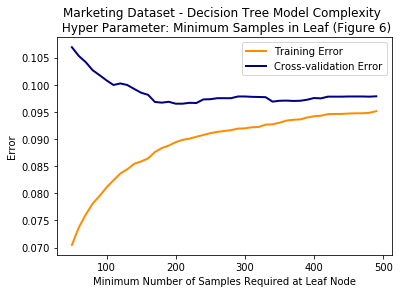

train_scores = [ 0.92951149  0.92628842  0.92391854  0.92191204  0.9204822   0.91892598
  0.91762255  0.91635071  0.91558444  0.91457327  0.91413089  0.91358581
  0.91240087  0.9116662   0.91120802  0.91059185  0.91015736  0.90993616
  0.90958858  0.90926469  0.90893291  0.90870382  0.90853003  0.90837204
  0.90808765  0.90804815  0.90784276  0.90778747  0.90735298  0.90729768
  0.9070054   0.90661832  0.90646032  0.90639713  0.90604164  0.90581255
  0.90570986  0.90542547  0.90539387  0.90538597  0.90531488  0.90526748
  0.90526748  0.90517268  0.90487251]
test_scores = [ 0.89310192  0.89471355  0.89585102  0.89733611  0.89825242  0.89920033
  0.9000535   0.89976915  0.9000536   0.90078036  0.90147558  0.90185475
  0.90318187  0.90330827  0.90315031  0.90349793  0.90349793  0.90333995
  0.90337155  0.902708    0.90267639  0.9024868   0.90248681  0.90248682
  0.90217081  0.90217082  0.90223403  0.90226563  0.90229723  0.90311875
  0.90296071  0.90292914  0.90299233  0.90296072  0.90277

In [16]:
np.random.seed(55)
estimator = tree.DecisionTreeClassifier()


param_range = np.arange(50,500,10)
train_scores, test_scores = validation_curve( estimator, X_train, y_train, param_name="min_samples_split", param_range=param_range,
    cv=5, scoring=make_scorer(accuracy_score), n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.title("Marketing Dataset - Decision Tree Model Complexity \n Hyper Parameter: Minimum Samples in Leaf (Figure 6)")
plt.xlabel("Minimum Number of Samples Required at Leaf Node")
plt.ylabel("Error")

lw = 2
plt.plot(param_range, 1 - train_mean, label="Training Error",
             color="darkorange", lw=lw)
plt.plot(param_range, 1 - test_mean, label="Cross-validation Error",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

print("train_scores =", train_mean)
print("test_scores =", test_mean)
print("Optimal minimum samples to split = ",  param_range[np.ndarray.argmax(test_mean)], " Minimum Error =  " , (1 - np.amax(test_mean))  )

### Create learning curve - Sample data set size vs. Error


train_scores = [ 0.88349719  0.88904494  0.89470974  0.89671699  0.89693842  0.89788168
  0.89835983  0.89875795  0.89952405  0.90014395]
test_scores = [ 0.88191615  0.8879515   0.89262786  0.89319695  0.89461862  0.89490337
  0.89499797  0.89604102  0.89746289  0.89825268]
train sizes = [ 2848  5696  8544 11392 14241 17089 19937 22785 25633 28482]


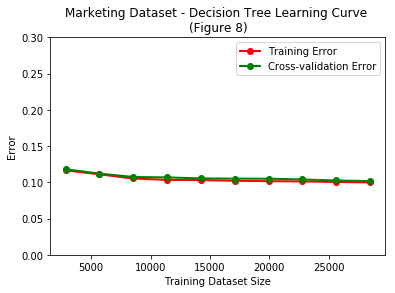

In [17]:
np.random.seed(55)
estimator = tree.DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 200)
st_train_time = timeit.default_timer() 
estimator.fit(X_train, y_train)
end_train_time = timeit.default_timer()

title = "Marketing Dataset - Decision Tree Learning Curve \n(Figure 8)"
ylim=(0.0, 0.3)
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)
#cv = StratifiedKFold(y_train, n_folds=10)
#plot_learning_curve(estimator, title, X_train, y_train, , cv=cv, n_jobs=4)



plt.title(title)
if ylim is not None:
    plt.ylim(*ylim)
plt.xlabel("Training Dataset Size")
plt.ylabel("Error")
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X_train, y_train, cv=10, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 10), shuffle = True)



train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
#test_scores_mean1 = np.mean(test_scores1, axis=1)

print("")
    
lw = 2
plt.plot(train_sizes, 1 - train_scores_mean, 'o-', color="r",
             label="Training Error",  lw=lw)
plt.plot(train_sizes, (1- test_scores_mean), 'o-', color="g",
             label="Cross-validation Error",  lw=lw)

plt.legend(loc="best")
print("train_scores =", train_scores_mean)
print("test_scores =", test_scores_mean)
print("train sizes =", train_sizes)

plt.show()




### Predict on Testing set

In [18]:
st_pred_time = timeit.default_timer() 
y_pred = estimator.predict(X_test)
end_pred_time = timeit.default_timer() 

pred_time = end_pred_time - st_pred_time

print("Accuracy: %s%%" % (100*accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred, target_names=['y', 'n']))
print("AUC =", roc_auc_score(y_test, y_pred))
print("Prediction Time = ", pred_time)
print("Training Time = ", end_train_time - st_train_time)



#Create timings for Cross-validation set


Accuracy: 89.9365968741%
[[11602   411]
 [  954   597]]
             precision    recall  f1-score   support

          y       0.92      0.97      0.94     12013
          n       0.59      0.38      0.47      1551

avg / total       0.89      0.90      0.89     13564

AUC = 0.675350011698
Prediction Time =  0.01043231601943262
Training Time =  0.1214619989914354


In [19]:
def plot_tree(clf,feature_names):
    tree.export_graphviz(clf,out_file='tree.dot',feature_names=feature_names, filled=True, rounded=True, special_characters=True, proportion=True)
    os.system("dot -Tpng tree.dot -o tree.png")
    os.system("tree.png")

features = columns[:12]
plot_tree(estimator, features)

Image(filename='tree.png')

NameError: name 'columns' is not defined

In [ ]:
estimator.n_features_